In [117]:
#import liberary
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [31]:
#read dataframe
df=pd.read_excel('/content/drive/MyDrive/Internship/AmiColo - Concordia University Data Science internshipUntitled folder/Dataset - Copy.xlsx')

In [32]:
#first 5 row view of dataset
df.head()

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SE
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SE
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SE
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SE
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SE


In [33]:
#dataset shape
df.shape

(13611, 17)

this show that dataset has 13611 rows and 17 columns

In [34]:
#dataset discription
df.describe()

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [35]:
#including non-numeric ones discription
df.describe(include='all')

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


In [36]:
#datset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   DFactor1         13611 non-null  float64
 4   DFactor2         13611 non-null  float64
 5   DFactor3         13611 non-null  float64
 6   DFactor4         13611 non-null  int64  
 7   DFactor5         13611 non-null  float64
 8   DFactor6         13611 non-null  float64
 9   DFactor7         13611 non-null  float64
 10  DFactor8         13611 non-null  float64
 11  DFactor9         13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [37]:
#check column 'Class' unique values
df['Class'].value_counts()

DE    3546
SI    2636
SE    2027
HO    1928
CA    1630
BA    1322
BO     522
Name: Class, dtype: int64

In [38]:
#checking present of null value in dataset
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
DFactor1           0
DFactor2           0
DFactor3           0
DFactor4           0
DFactor5           0
DFactor6           0
DFactor7           0
DFactor8           0
DFactor9           0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

from above we can see that dataset has no null value

In [39]:
#checking duplicates value in dataset
df.duplicated().sum()

68

This show that dataset has 68 duplicates value

In [40]:
#chech which columns has duplicates value
duplicate_columns = df.columns[df.apply(lambda x: x.duplicated()).any()]
print(duplicate_columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2',
       'DFactor3', 'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8',
       'DFactor9', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'Class'],
      dtype='object')


Above all columns has duplicates values.



In [41]:
df_new = df.drop_duplicates(subset=duplicate_columns)

In [42]:
#check duplicates value in new dataset
df_new.duplicated().sum()

0

Now our dataset has no duplicates values

In [43]:
# Encode the 'Class' column ( 'Class' is categorical)
df_new = pd.get_dummies(df_new, columns=['Class'], drop_first=True)

In [44]:
#look of numerical dataset (after droping categorical column=Class)
df_new.head()

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,...,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BO,Class_CA,Class_DE,Class_HO,Class_SE,Class_SI
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.007332,0.003147,0.834222,0.998724,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.006979,0.003564,0.909851,0.998430,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.007244,0.003048,0.825871,0.999066,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.007017,0.003215,0.861794,0.994199,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.006697,0.003665,0.941900,0.999166,0,0,0,0,1,0


In [45]:
#information of new dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   DFactor1         13543 non-null  float64
 4   DFactor2         13543 non-null  float64
 5   DFactor3         13543 non-null  float64
 6   DFactor4         13543 non-null  int64  
 7   DFactor5         13543 non-null  float64
 8   DFactor6         13543 non-null  float64
 9   DFactor7         13543 non-null  float64
 10  DFactor8         13543 non-null  float64
 11  DFactor9         13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class_BO         13543 non-null  uint8  
 17  Class_CA    

Above information shows that our dataset has no categorical columns, which is good for our machine learning model implementation.

##***Visulizations***

In [149]:
# Set the style of the pair plot
sns.set(style="whitegrid")

In [150]:
# Specify the DataFrame columns for the pair plot
pairplot_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2', 'DFactor3', 'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8', 'DFactor9', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class_BO']


In [ ]:
# Create a pair plot with 'Class_BO' as the hue
sns.pairplot(df_new[pairplot_columns], hue='Class_BO', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.show()

In [65]:
df_new.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2',
       'DFactor3', 'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8',
       'DFactor9', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'Class_BO', 'Class_CA', 'Class_DE', 'Class_HO',
       'Class_SE', 'Class_SI'],
      dtype='object')

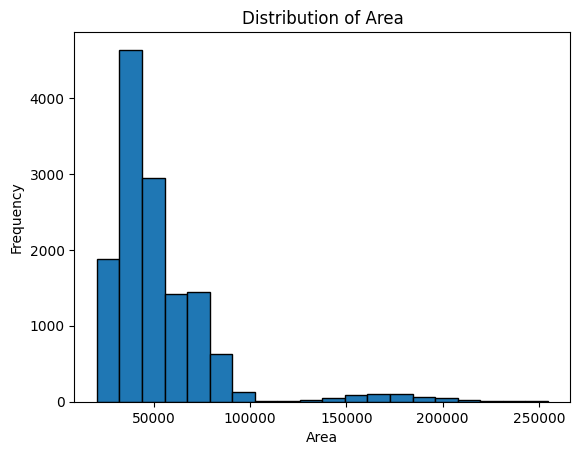

In [64]:
#Histogram for the 'Area' feature
plt.hist(df['Area'], bins=20, edgecolor='k')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')
plt.show()

###**Distribution plot shows the distribution of values with respect to their density**

<ipython-input-53-67e6cdcff74e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-53-67e6cdcff74e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-53-67e6cdcff74e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

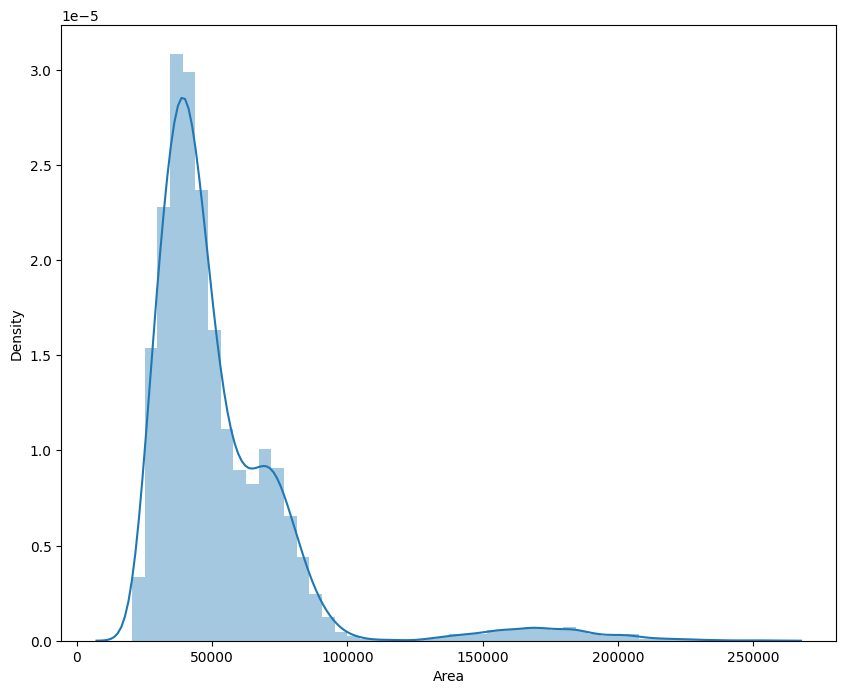

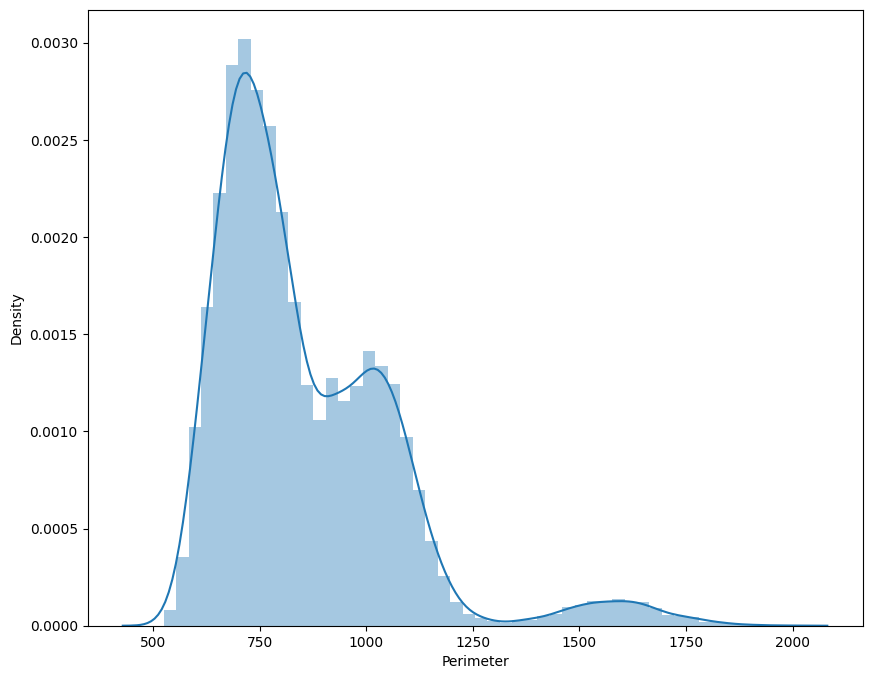

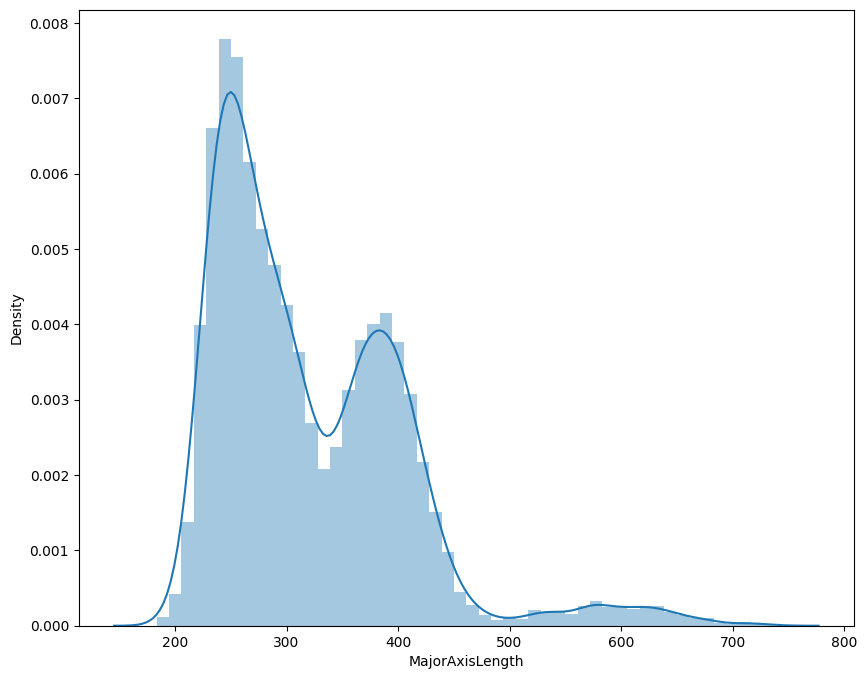

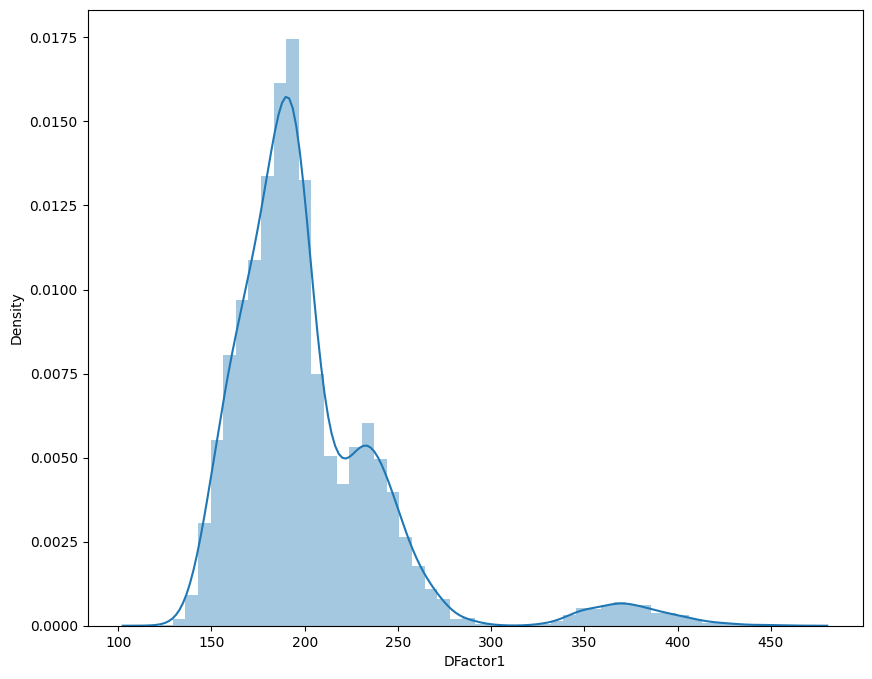

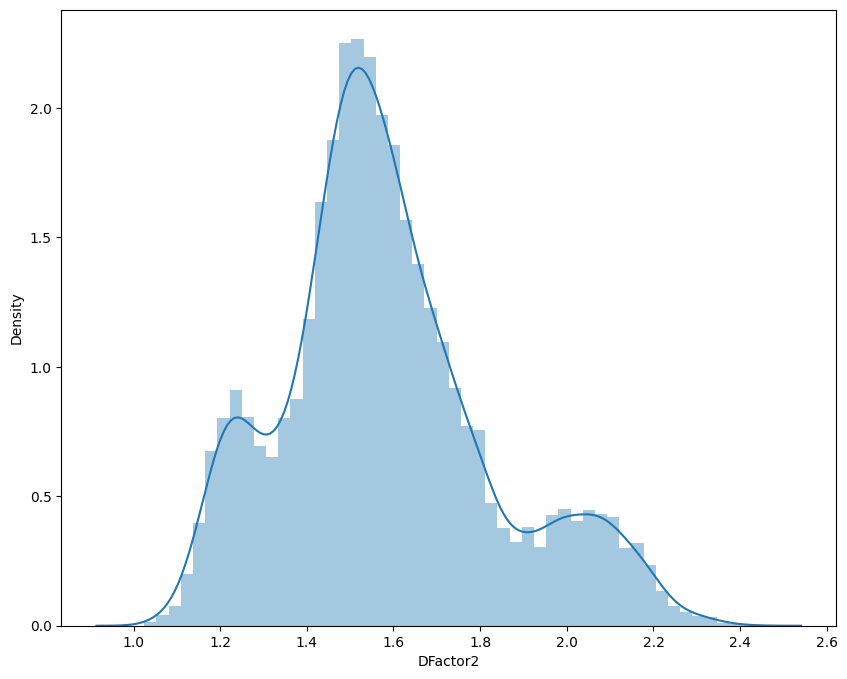

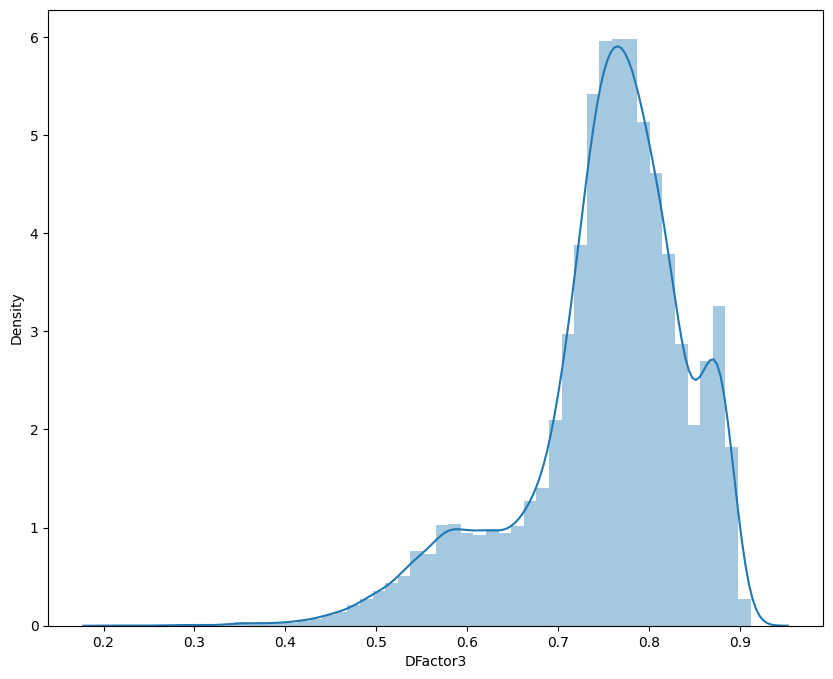

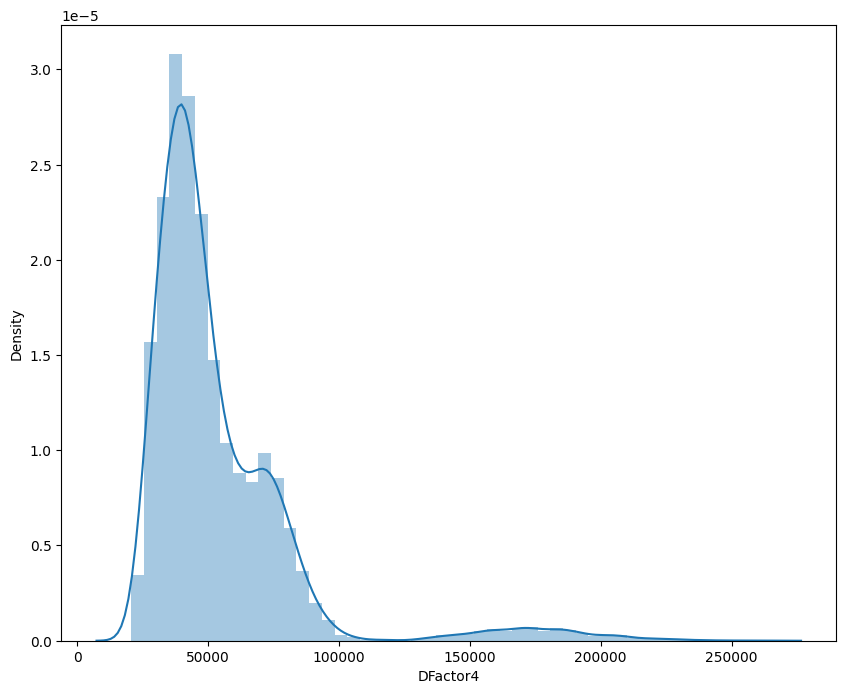

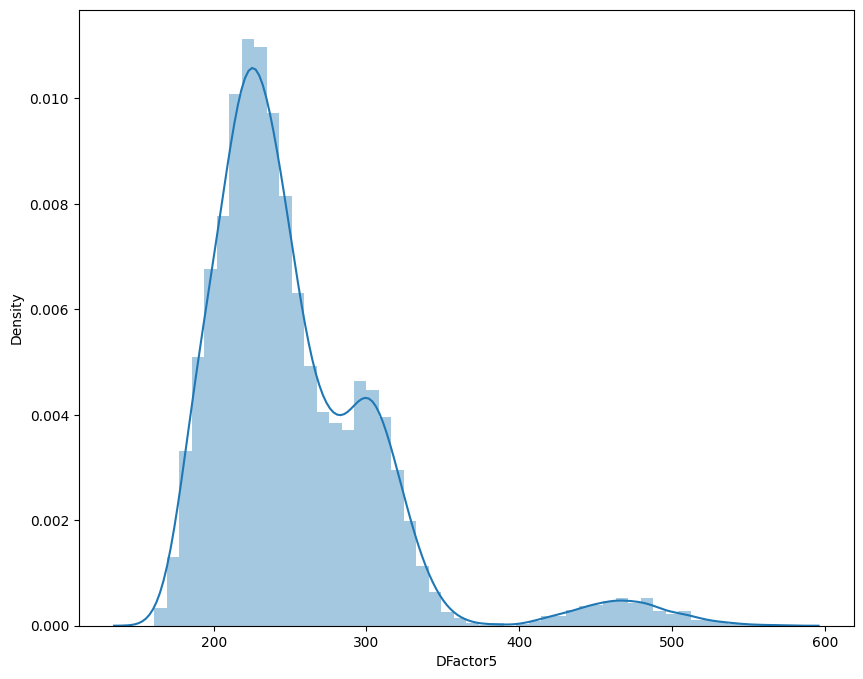

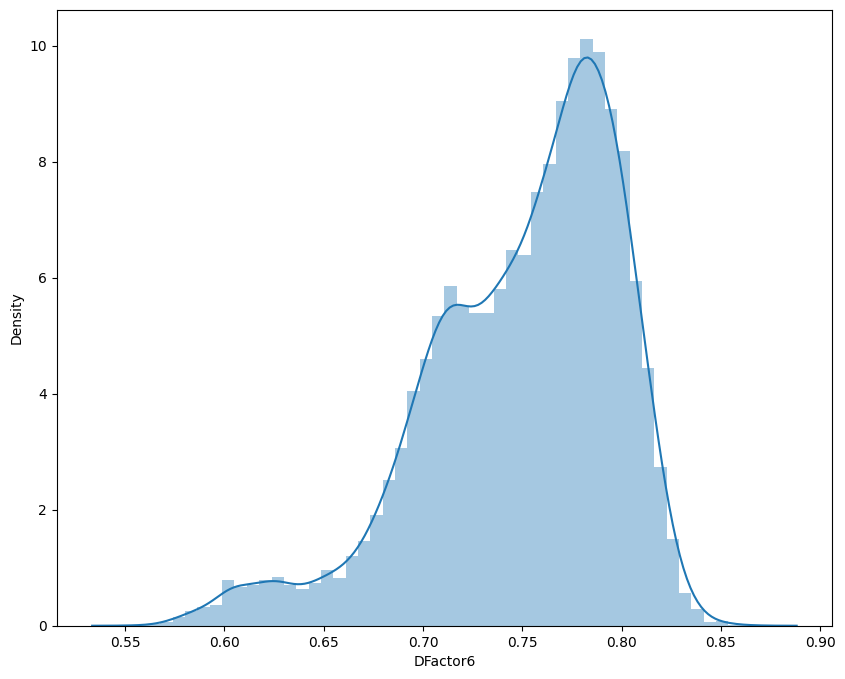

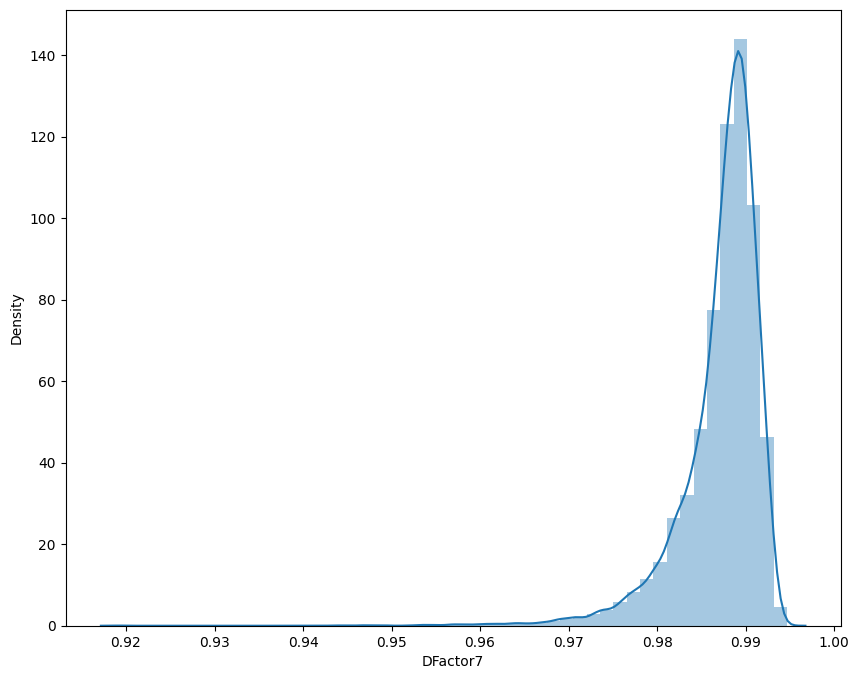

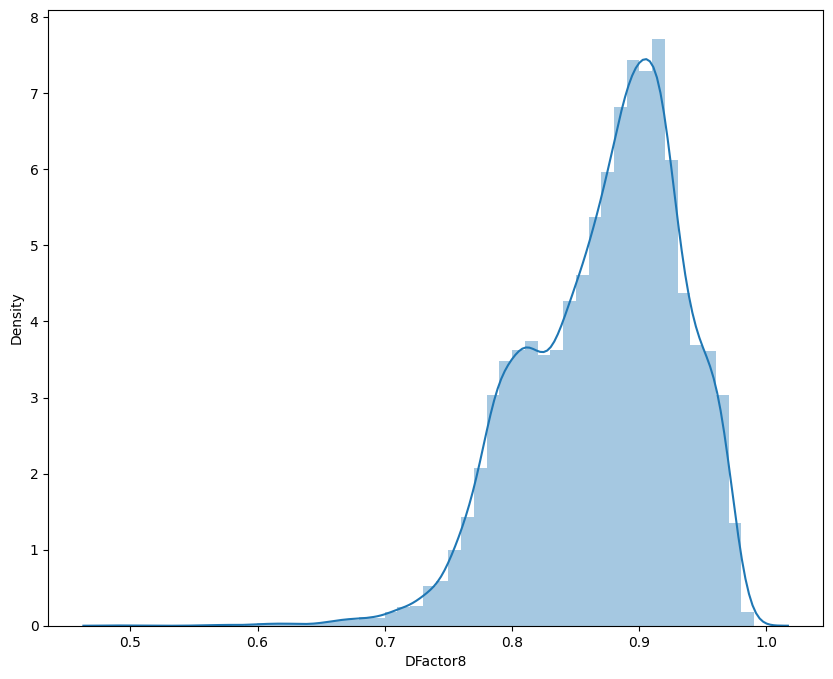

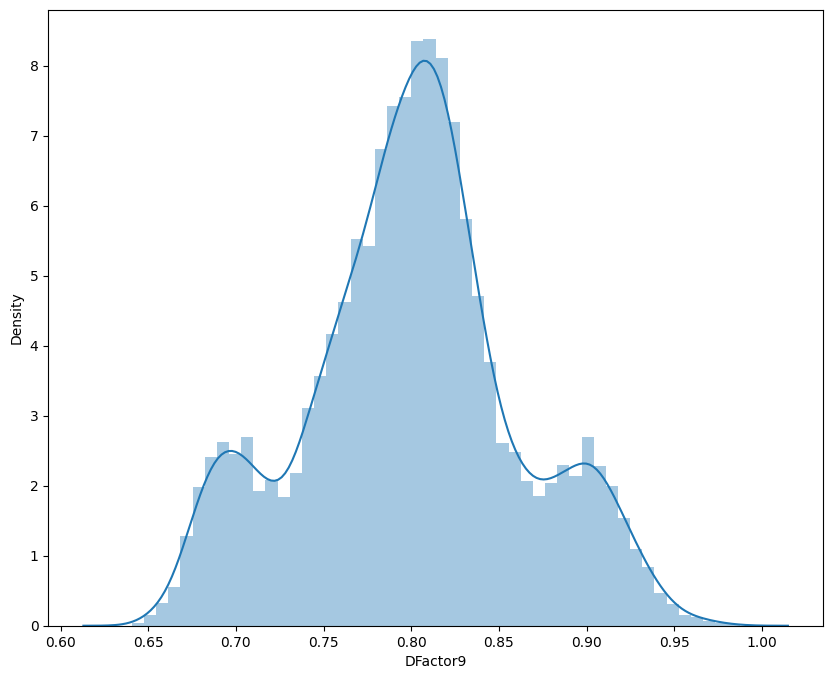

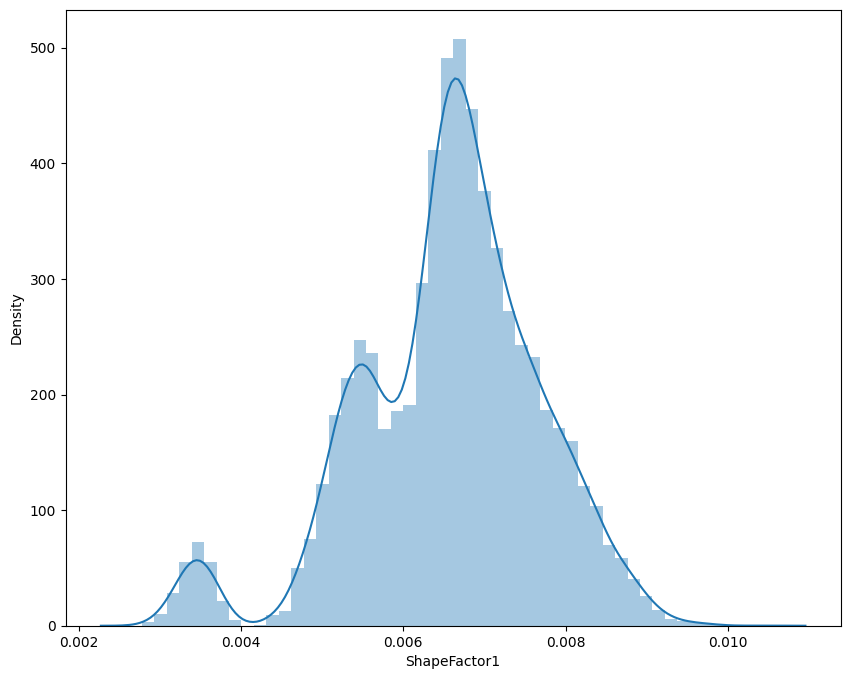

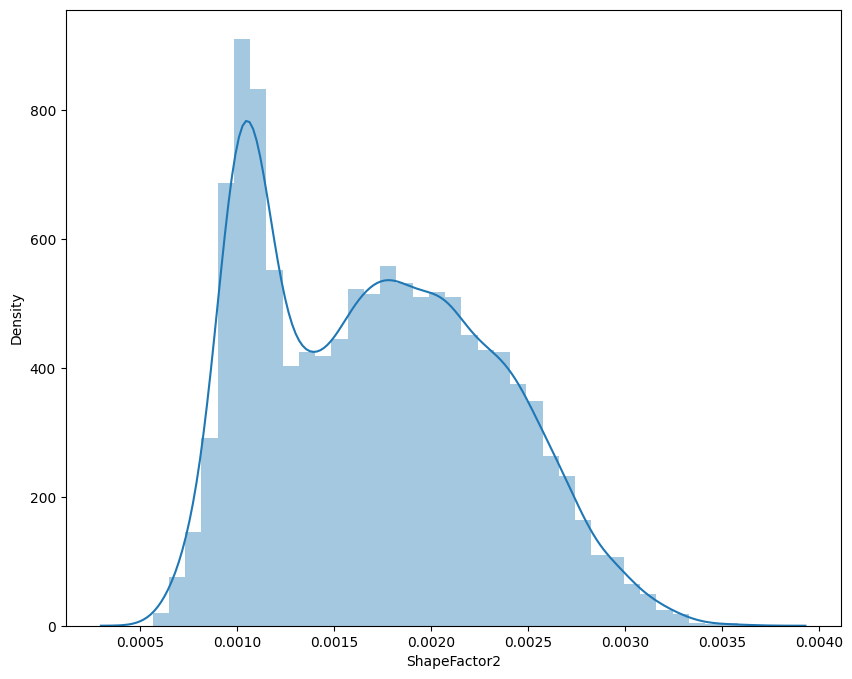

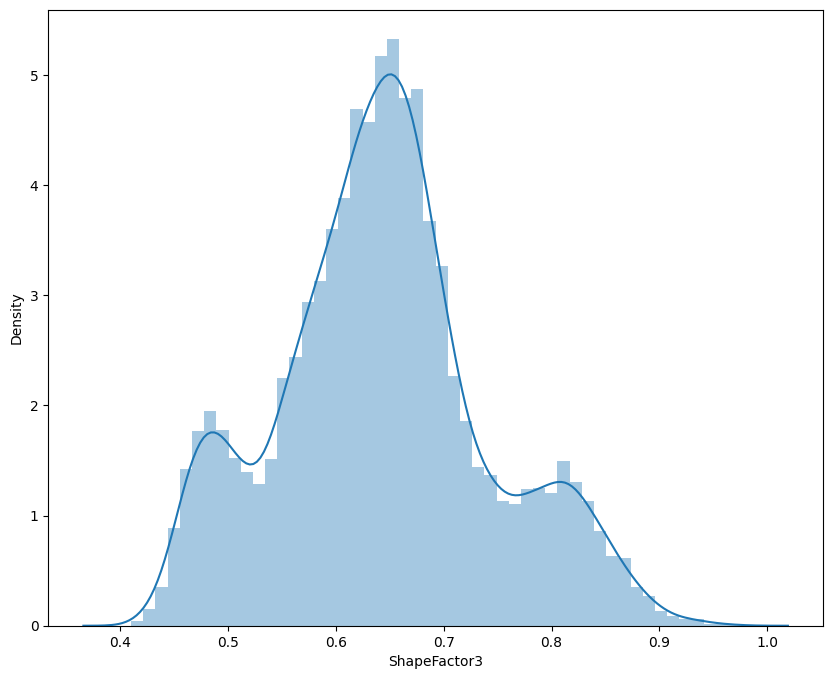

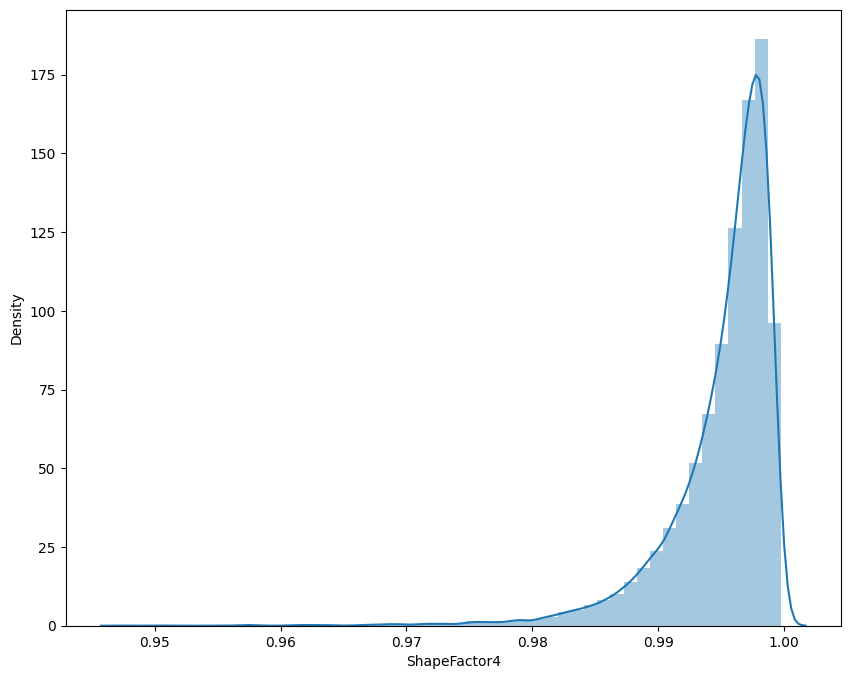

In [53]:
for col in df_new.columns[:-6]:
  plt.figure(figsize=(10,8))
  sns.distplot(df[col])

<ipython-input-55-c991c4fcb5f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df[col]))
<ipython-input-55-c991c4fcb5f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df[col]))
<ipython-input-55-c991c4fcb5f6>:3: UserWarning: 

`distplot` is a deprecated function and will b

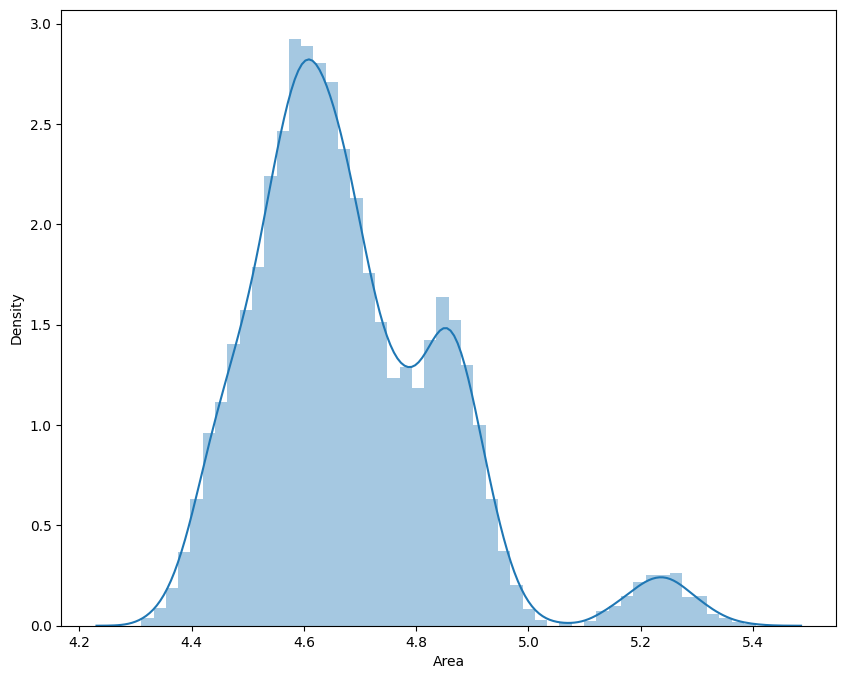

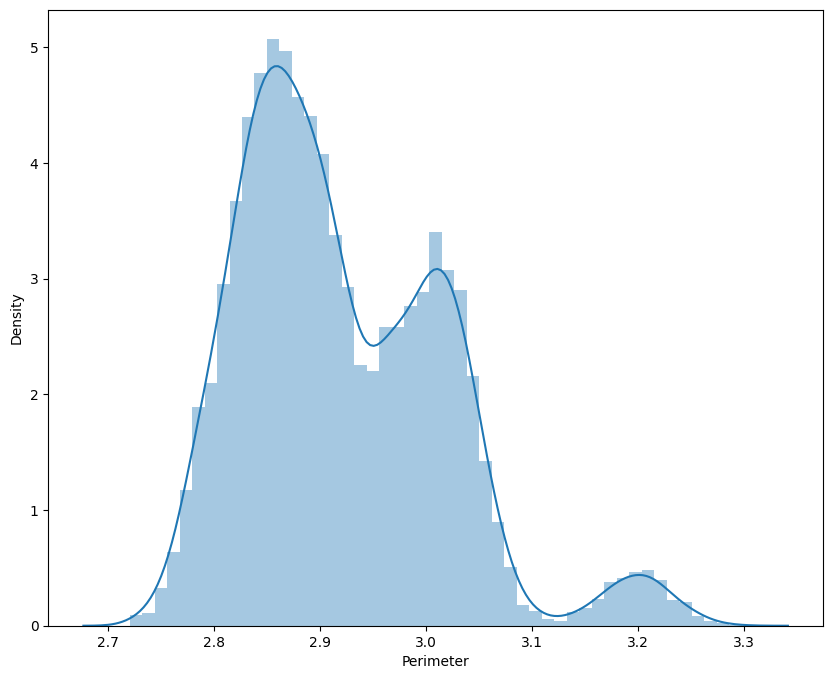

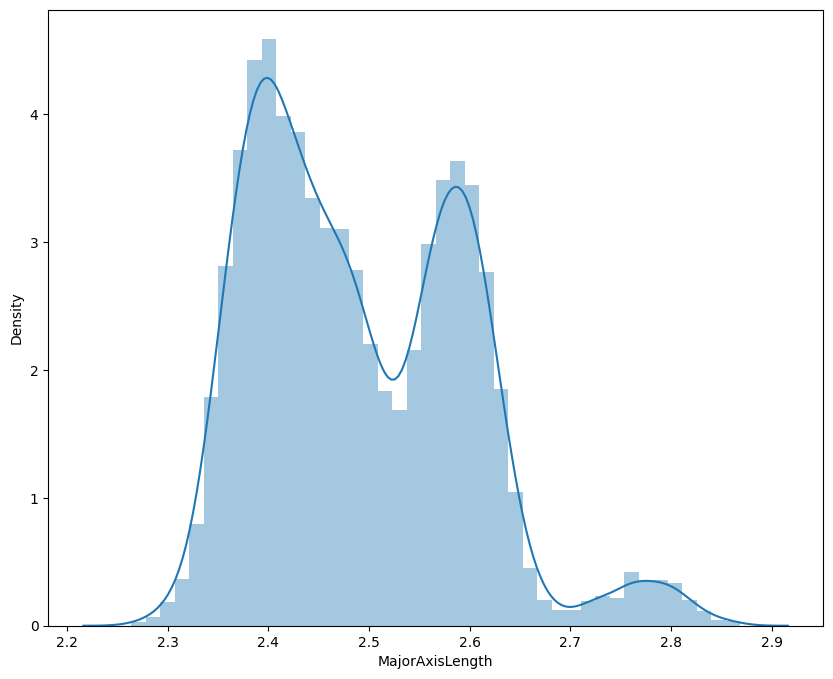

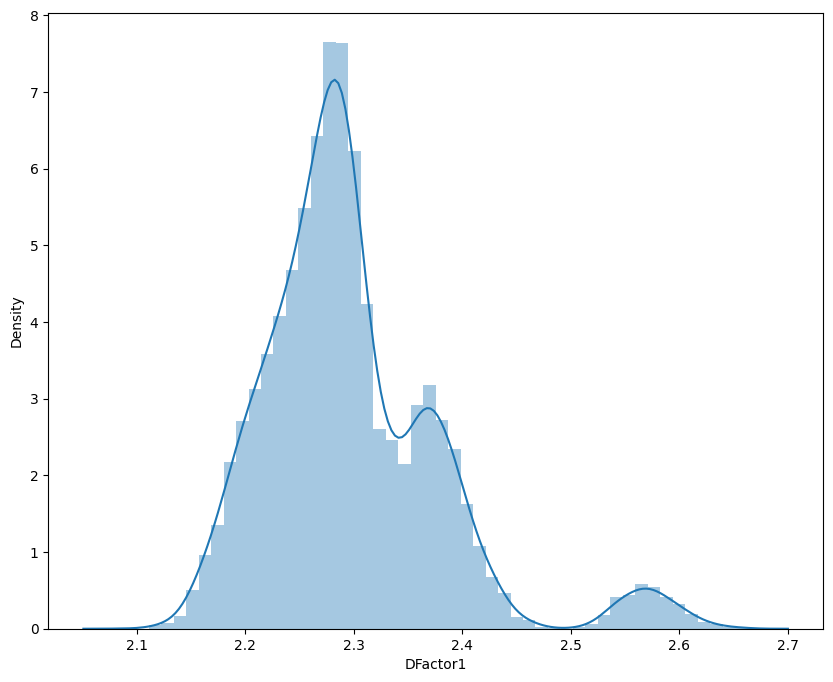

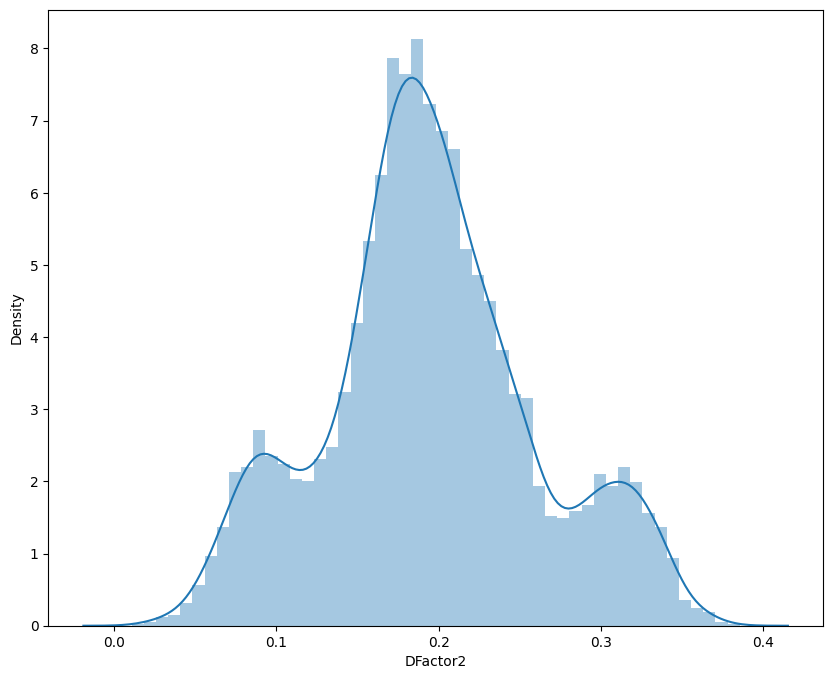

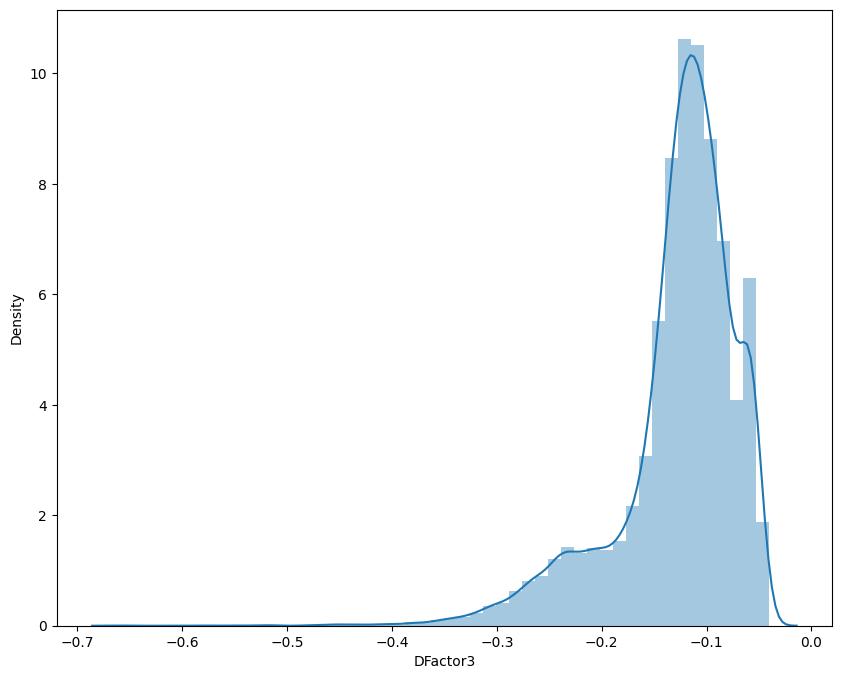

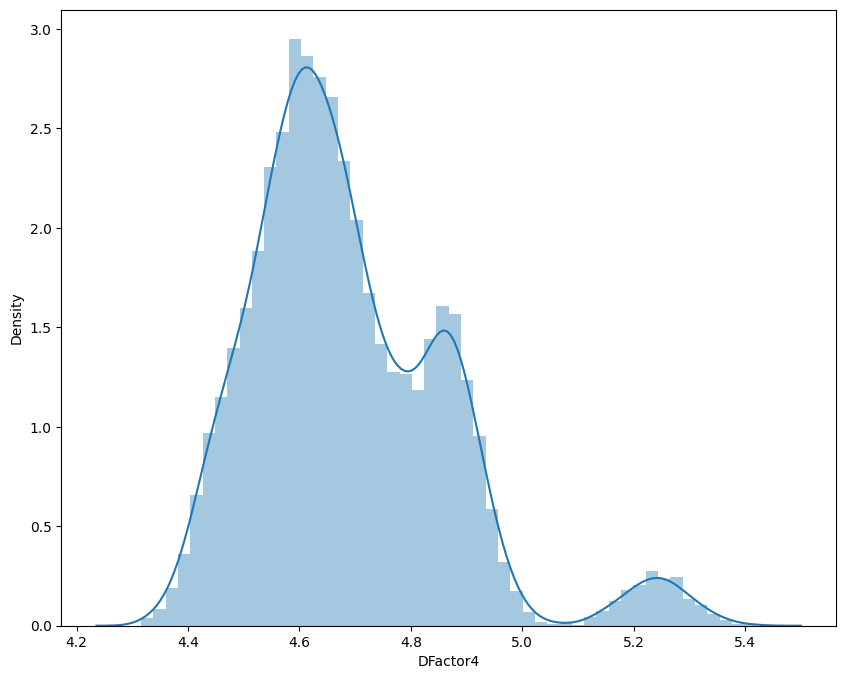

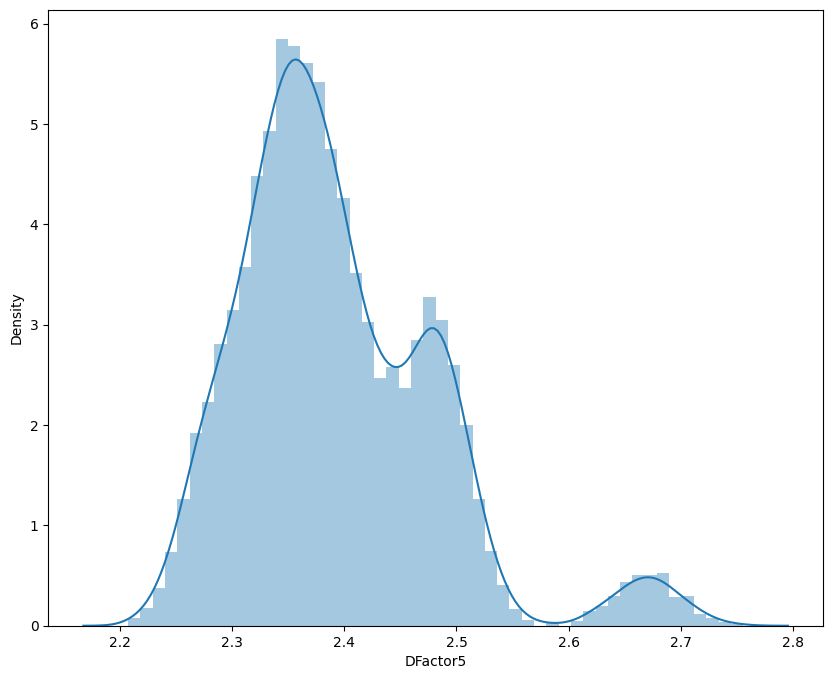

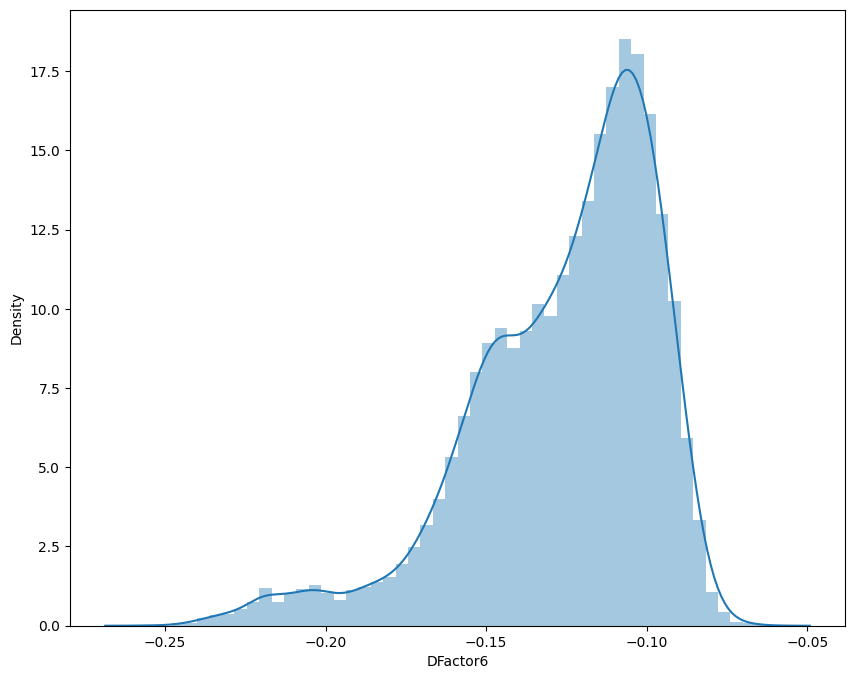

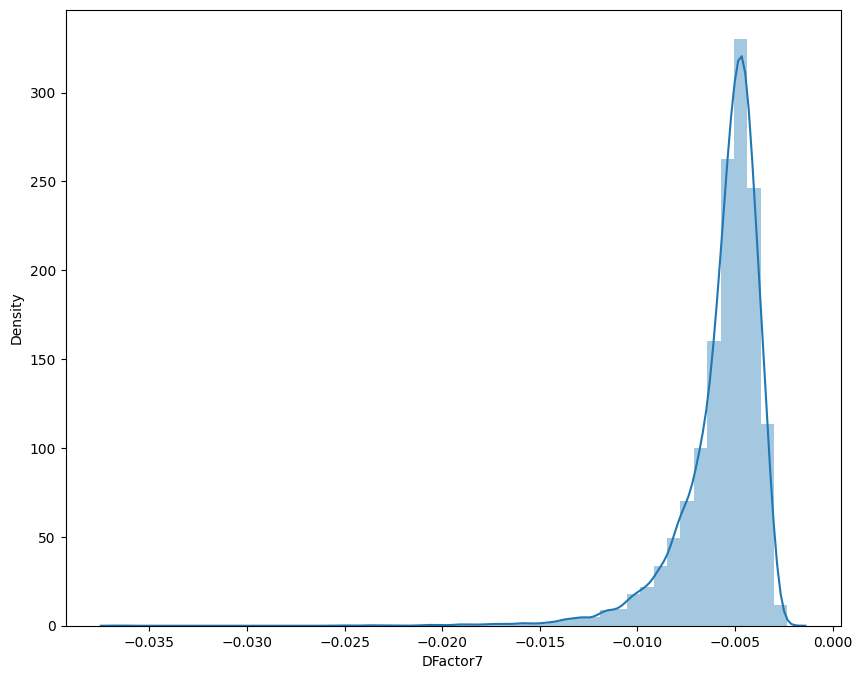

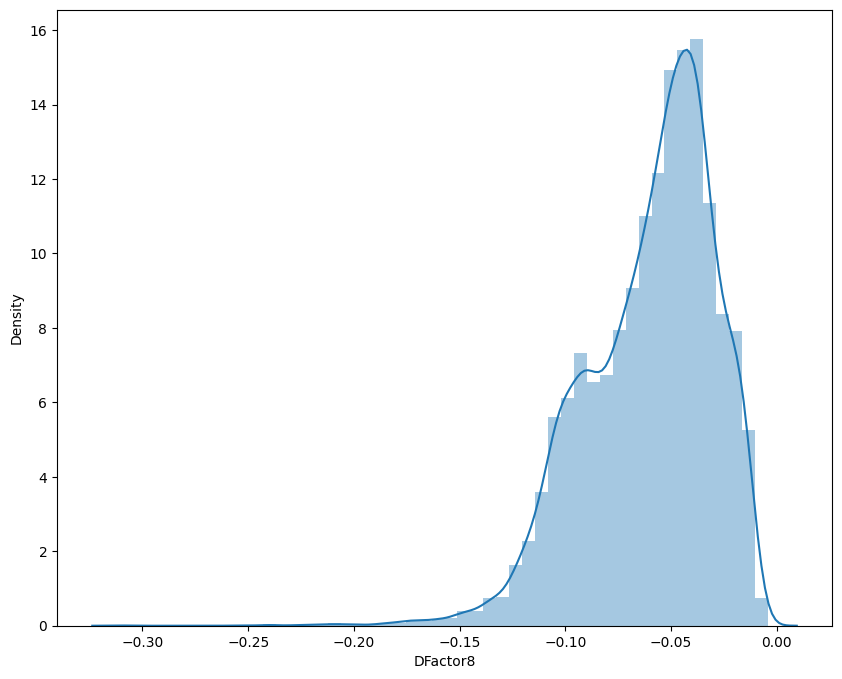

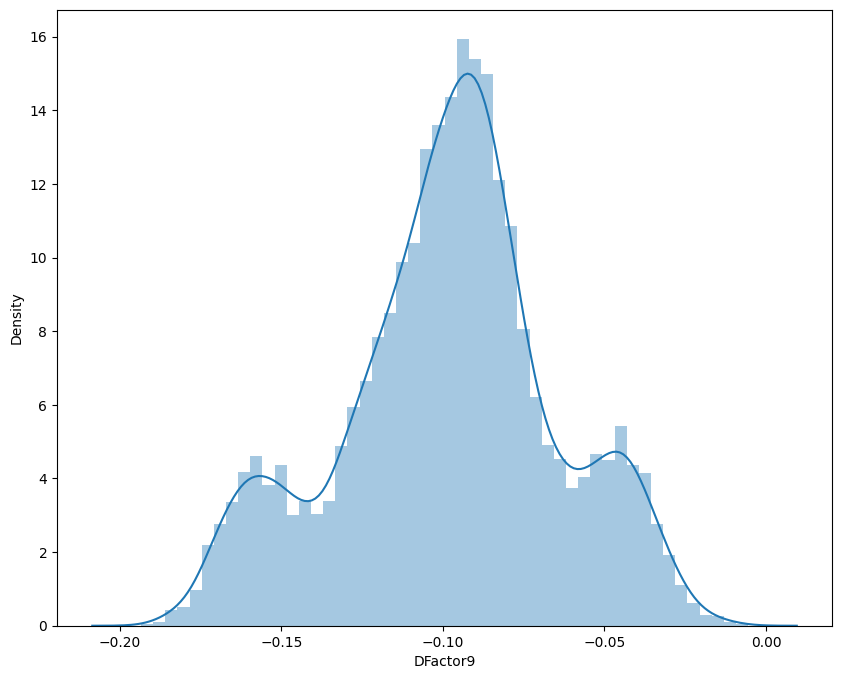

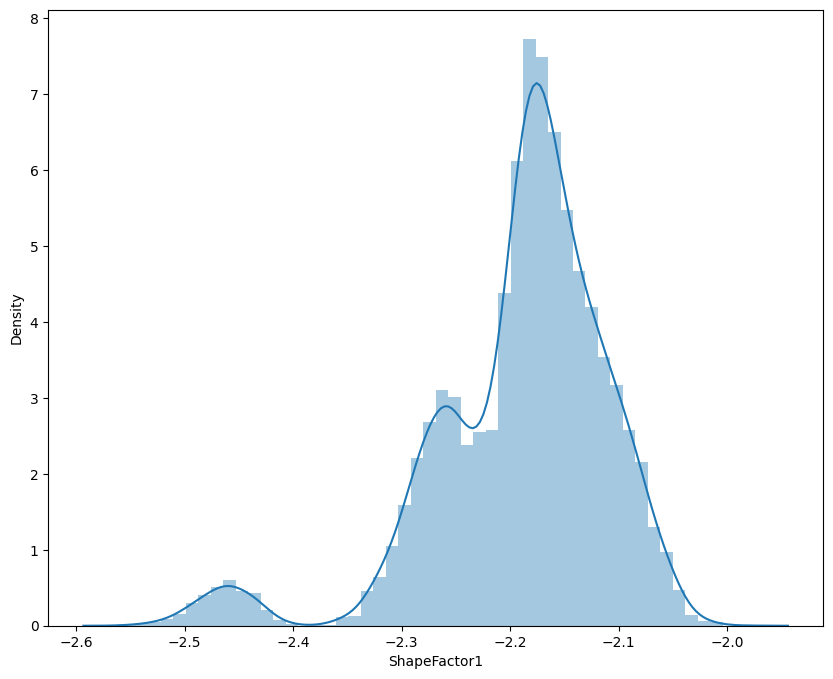

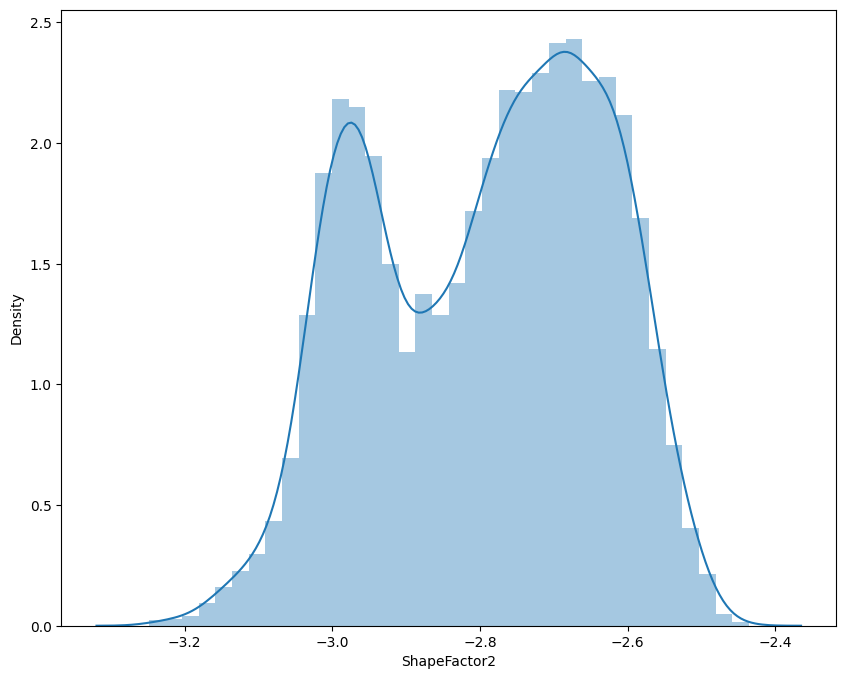

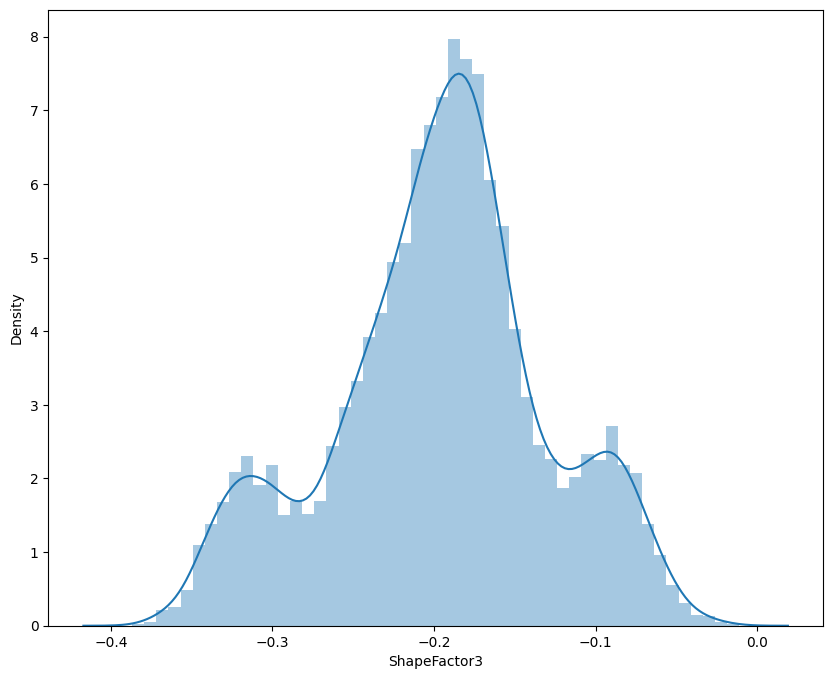

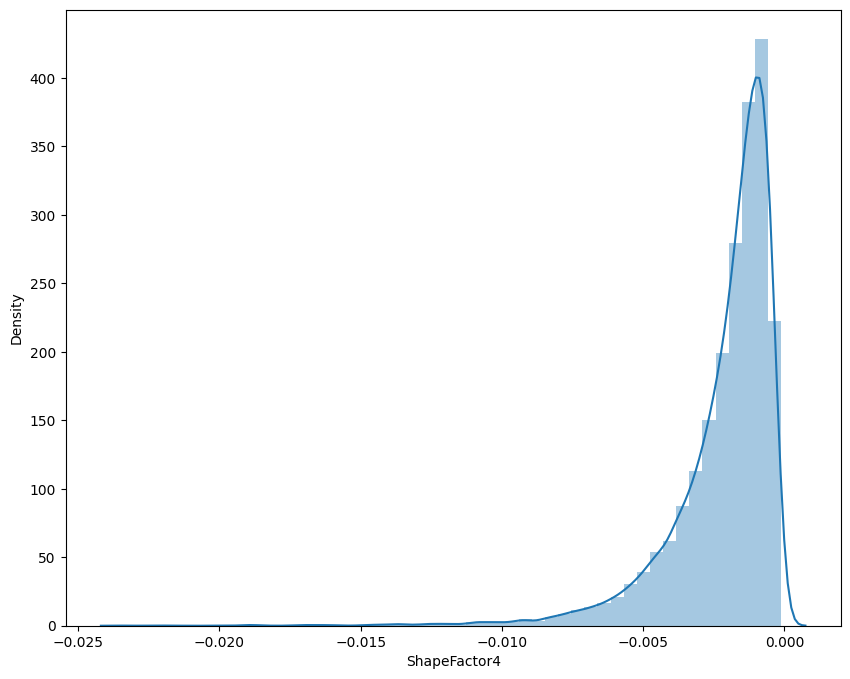

In [55]:
for col in df_new.columns[:-6]:
  plt.figure(figsize=(10,8))
  sns.distplot(np.log10(df[col]))

###**Now Visulization of columns 'Class' with respect to other columns**

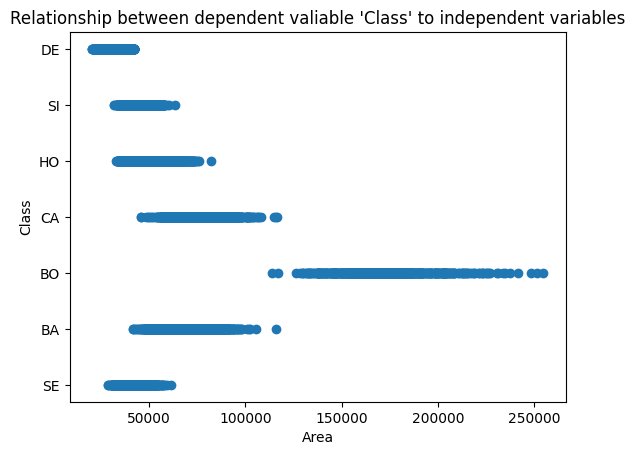

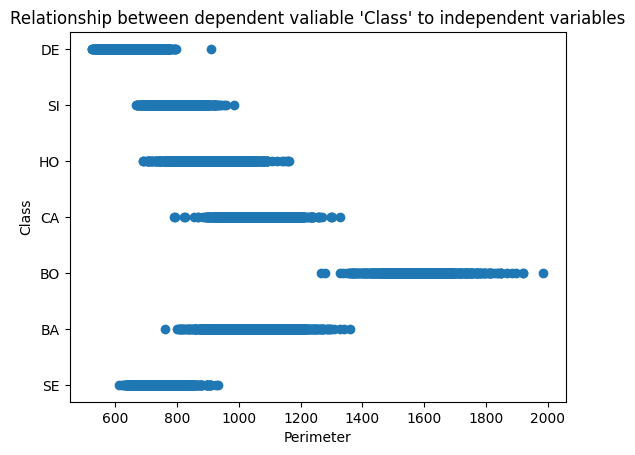

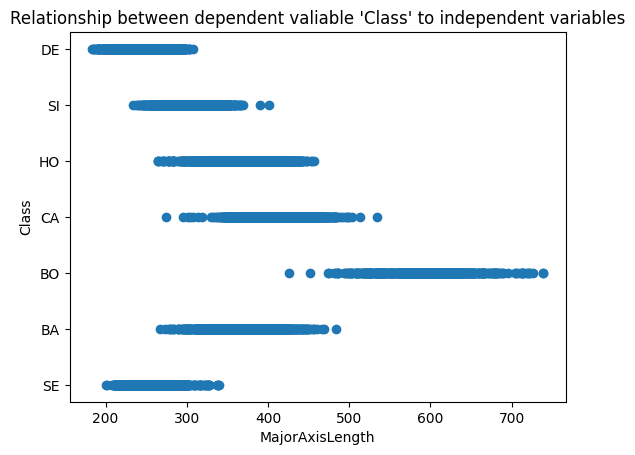

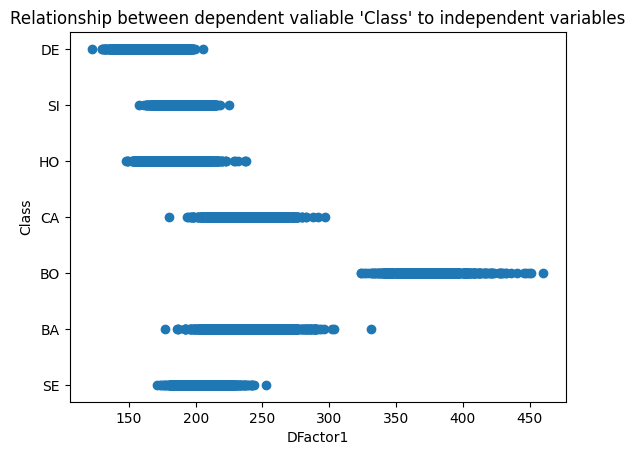

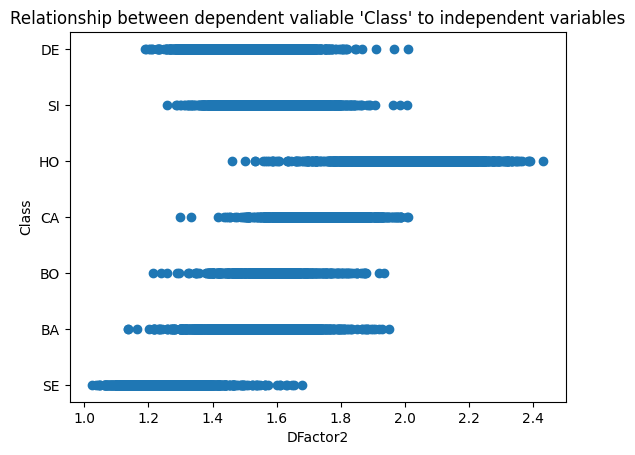

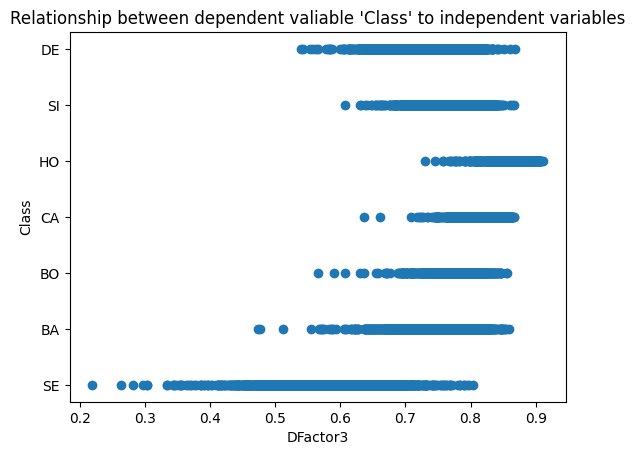

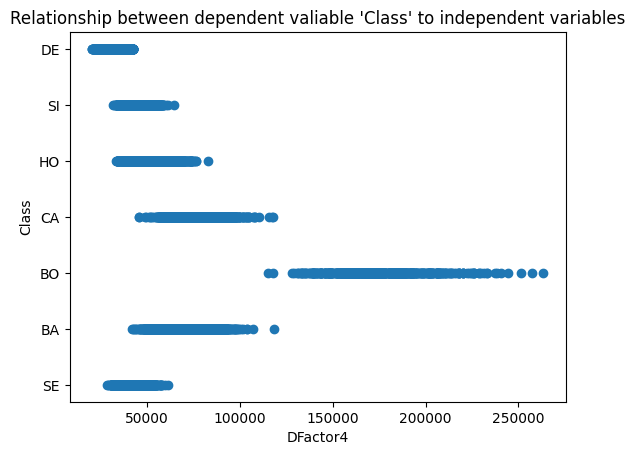

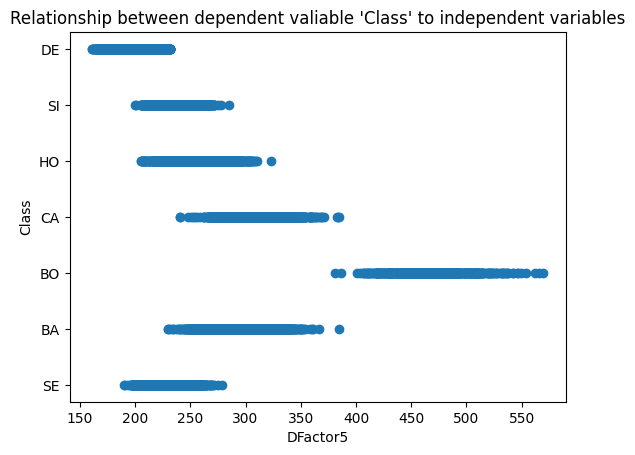

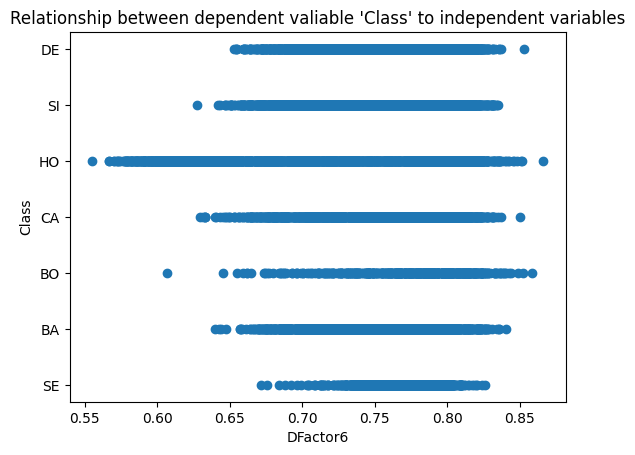

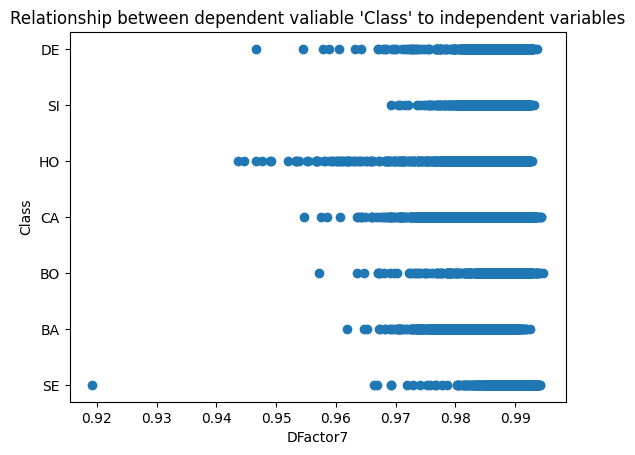

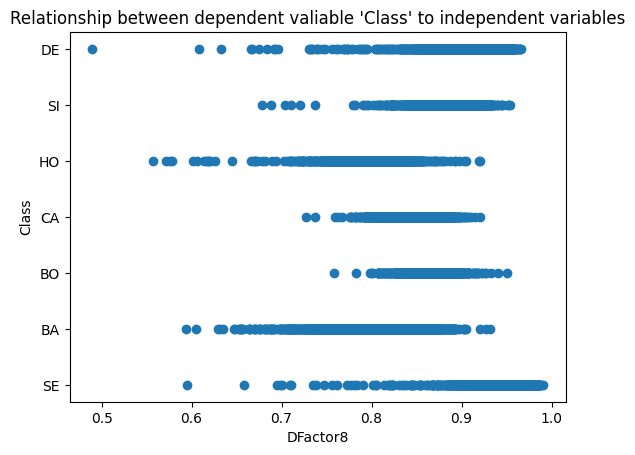

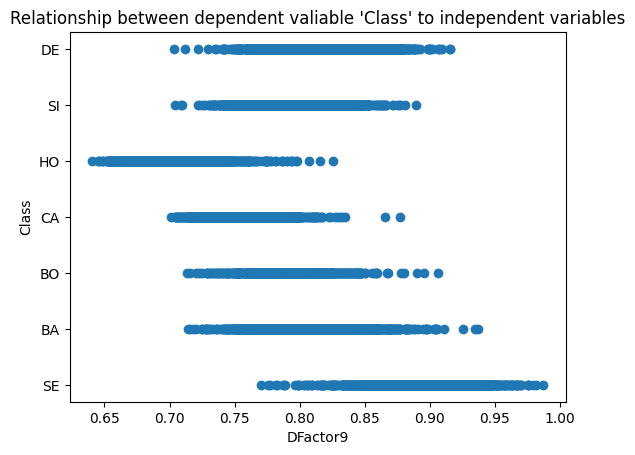

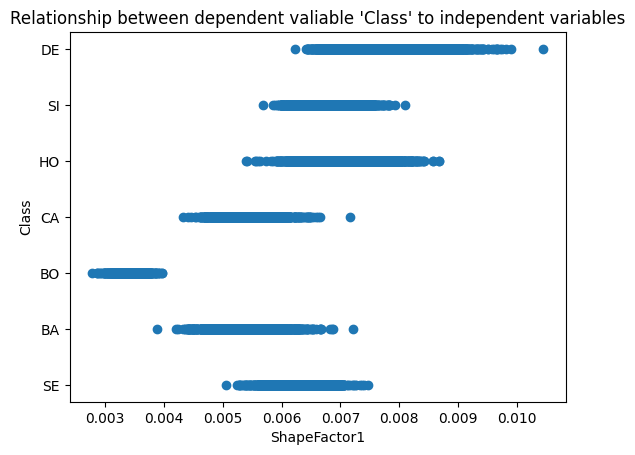

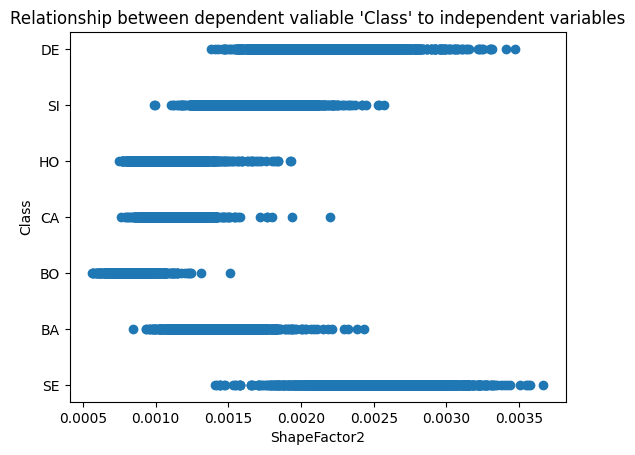

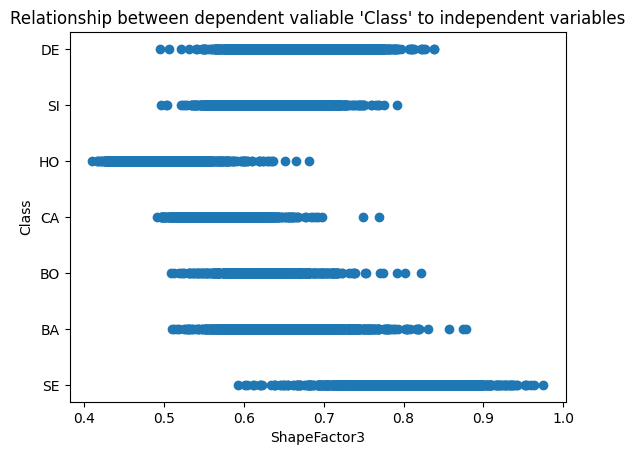

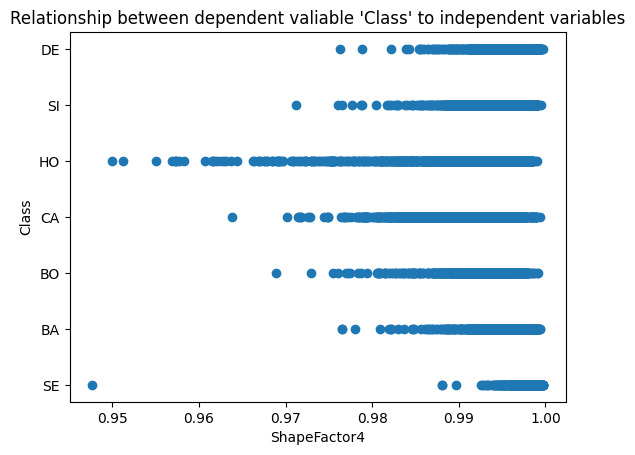

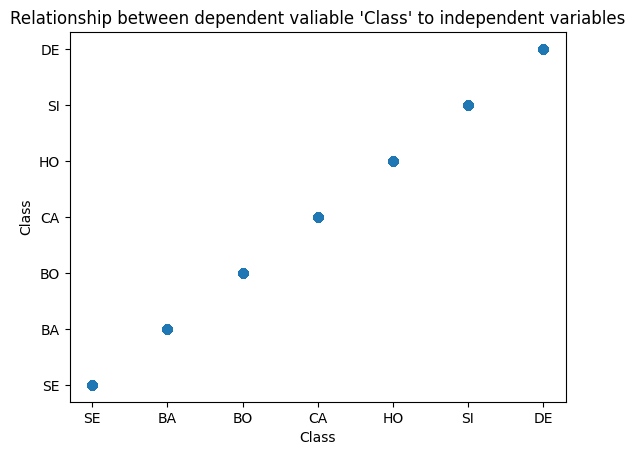

In [57]:
for i in df.columns:
  plt.scatter(df[i],df['Class'])
  plt.title("Relationship between dependent valiable 'Class' to independent variables")
  plt.xlabel(i)
  plt.ylabel('Class')
  plt.show()

##**Show Correlation**

<Axes: >

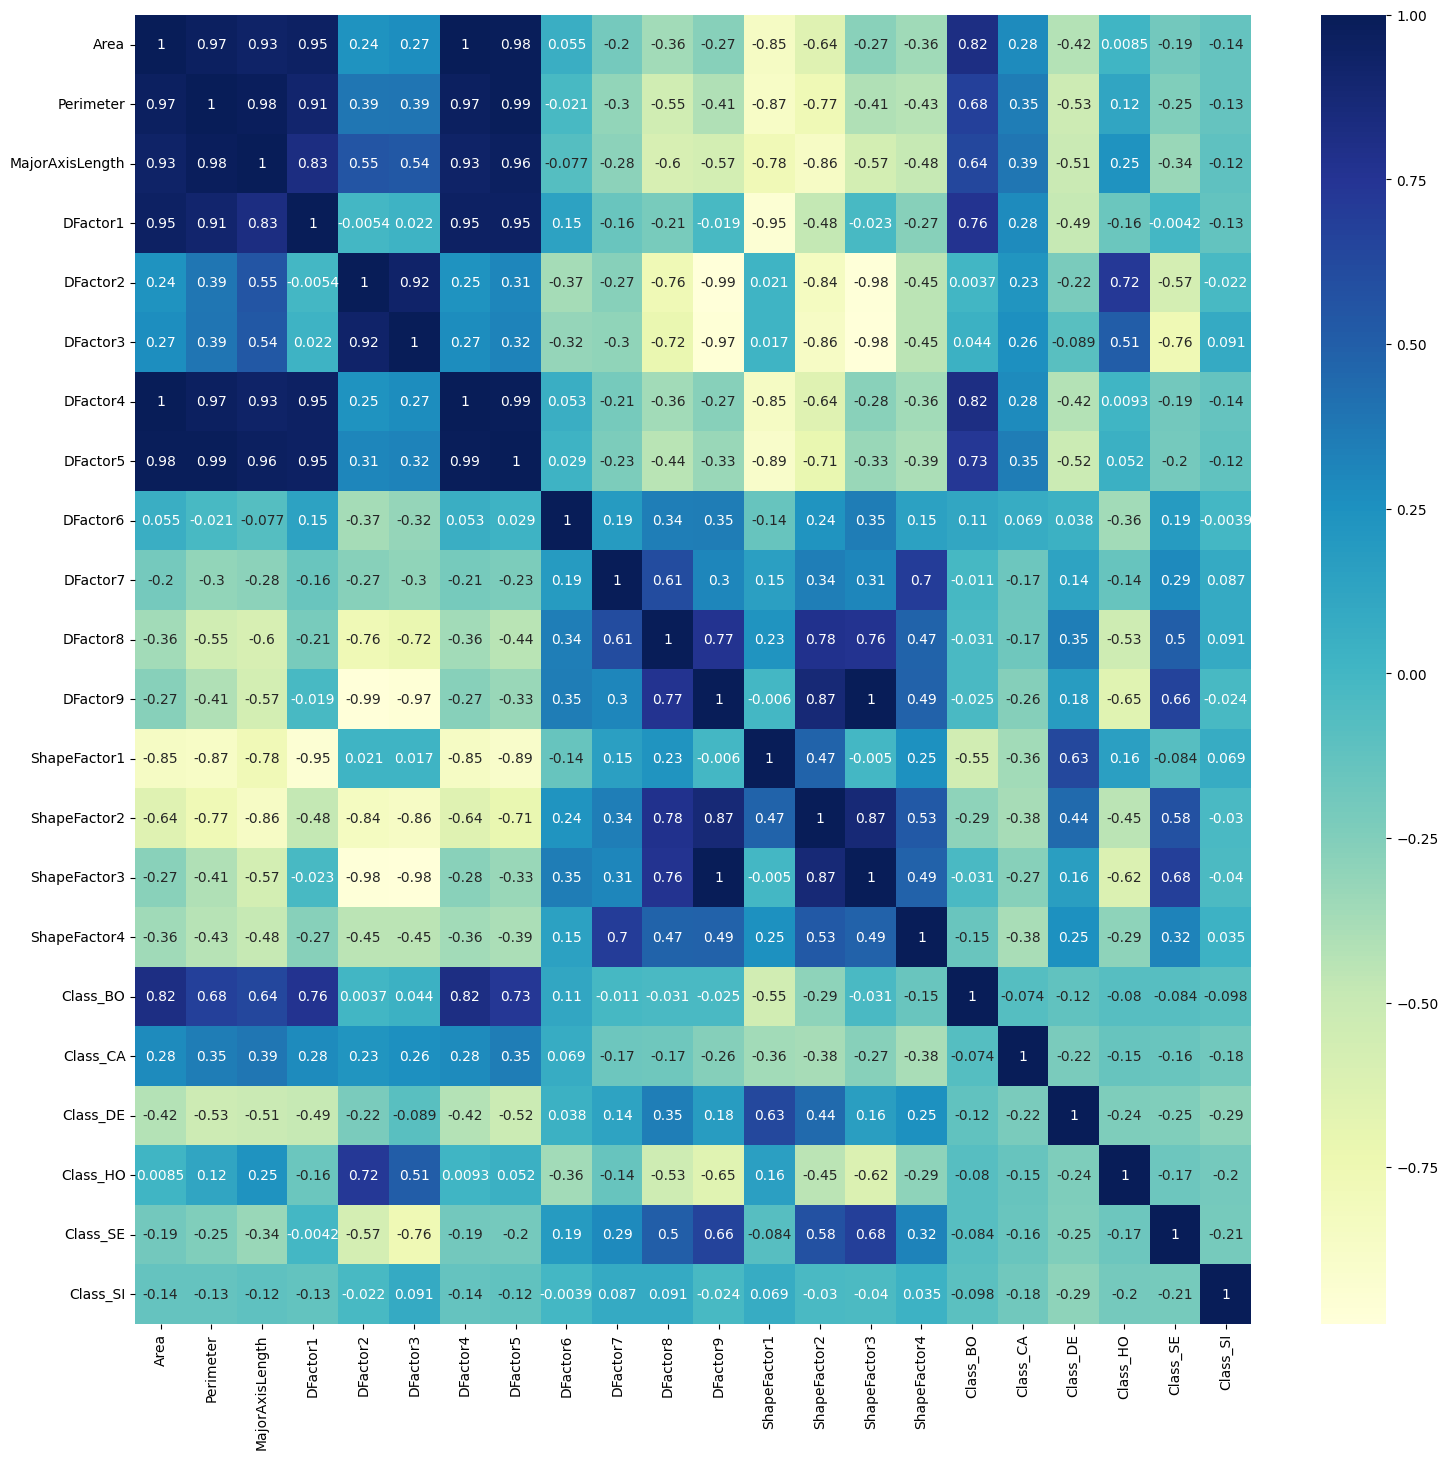

In [73]:
corr_matrix = df_new.corr()
plt.figure(figsize=(18, 17))
sns.heatmap(corr_matrix,  annot=True, cmap="YlGnBu")

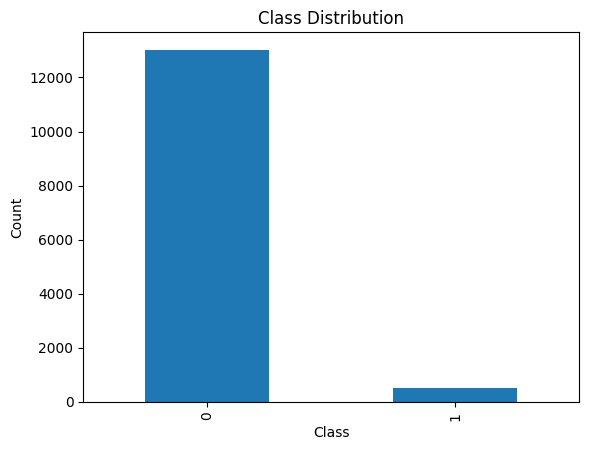

In [75]:
#Bar plot for 'Class' distribution
df_new['Class_BO'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

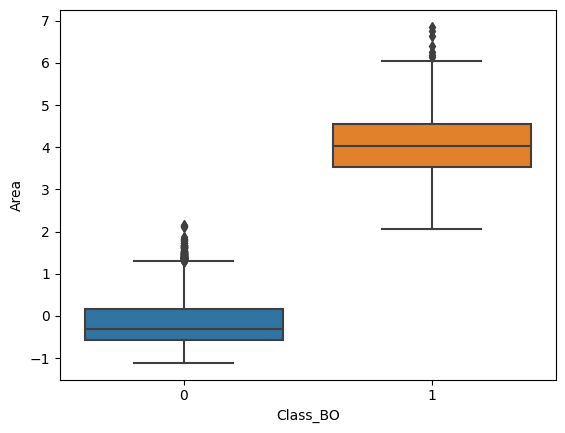

In [76]:
# Box plot for 'Area' by class
sns.boxplot(x='Class_BO', y='Area', data=df_new)
plt.show()

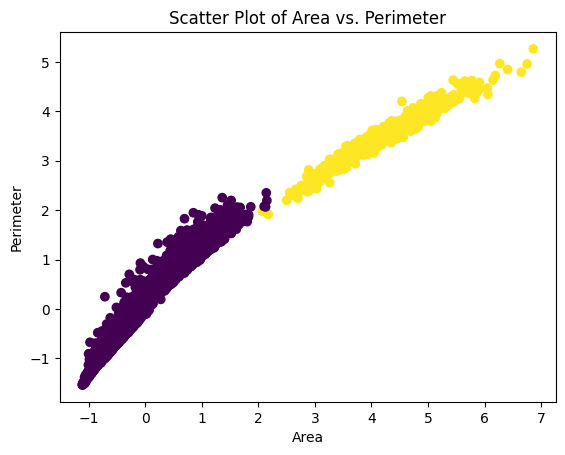

In [79]:
# Scatter plot of 'Area' vs. 'Perimeter'
plt.scatter(df_new['Area'], df_new['Perimeter'], c=df_new['Class_BO'])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter Plot of Area vs. Perimeter')
plt.show()

#**Split the DataSet**

In [50]:
# Define your feature matrix (X) and target variable (y)
X = df_new.drop(['Class_BO', 'Class_CA', 'Class_DE', 'Class_HO', 'Class_SE', 'Class_SI'], axis=1)
y = df_new[['Class_BO', 'Class_CA', 'Class_DE', 'Class_HO', 'Class_SE', 'Class_SI']]


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
y_train

,Class_BO,Class_CA,Class_DE,Class_HO,Class_SE,Class_SI
5963,0,0,0,1,0,0
13060,0,0,1,0,0,0
10327,0,0,1,0,0,0
591,0,0,0,0,1,0
10931,0,0,1,0,0,0
...,...,...,...,...,...,...
5191,0,1,0,0,0,0
13486,0,0,1,0,0,0
5390,0,1,0,0,0,0
860,0,0,0,0,1,0


In [58]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [60]:
# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [61]:
X_train

array([[-0.14835145,  0.09071354,  0.37307936, ..., -1.01084769,
        -1.45790619,  0.11869882],
       [-0.53252543, -0.59679411, -0.52886544, ...,  0.15114821,
        -0.12022463,  0.57645998],
       [-0.94140875, -1.17883183, -1.0494912 , ...,  0.63362139,
        -0.31022475,  0.28591469],
       ...,
       [ 1.26373825,  1.40726978,  1.59735148, ..., -1.30216976,
        -0.96664631, -0.23283181],
       [-0.49899863, -0.67042564, -0.8536193 , ...,  1.41012366,
         1.61797985,  0.86222347],
       [ 0.42898606,  0.77278412,  0.9264202 , ..., -1.15784375,
        -1.22468158, -2.54313742]])

##**Model Selection**

###**First- RandomForestClassifier**

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [83]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [84]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [88]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test.values.argmax(axis=1), y_pred_rf.argmax(axis=1))
classification_rep_rf = classification_report(y_test, y_pred_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
precision = precision_score(y_test, y_pred_rf,average='micro')
recall = recall_score(y_test, y_pred_rf,average='micro')
f1 = f1_score(y_test, y_pred_rf,average='micro')

In [125]:
# Print the results
print("RandomForestClassifier Results:")
print("Accuracy:", accuracy_rf)
print("precision:", precision)
print("recall:", recall)
print("f1_Score:", f1)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)

RandomForestClassifier Results:
Accuracy: 0.9147286821705426
precision: 0.9265070189925682
recall: 0.9159183673469388
f1_Score: 0.9211822660098522
Confusion Matrix:
 [[348  18   0   0   1   6]
 [ 11 290   0   1   1   2]
 [ 15   0 642   0  11  39]
 [  8   3   6 353   0   6]
 [  9   0  11   0 385   9]
 [ 10   0  49   9   6 460]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.93      0.95      0.94       305
           2       0.91      0.91      0.91       707
           3       0.97      0.94      0.96       376
           4       0.95      0.93      0.94       414
           5       0.88      0.86      0.87       534

   micro avg       0.93      0.92      0.92      2450
   macro avg       0.94      0.93      0.94      2450
weighted avg       0.93      0.92      0.92      2450
 samples avg       0.83      0.83      0.83      2450



##**Second- KNeighborsClassifier**

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [111]:
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [112]:
# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)


In [113]:
y_pred_knn

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [115]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
classification_rep_knn = classification_report(y_test, y_pred_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
precision_kn = precision_score(y_test, y_pred_knn,average='micro')
recall_kn = recall_score(y_test, y_pred_knn,average='micro')
f1_kn = f1_score(y_test, y_pred_knn,average='micro')

In [128]:
# Print the results
print("KNeighborsClassifier Results:")
print("Accuracy:", accuracy_knn)
print("precision:", precision_kn)
print("recall:", recall_kn)
print("f1_Score:", f1_kn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)

KNeighborsClassifier Results:
Accuracy: 0.9195275009228497
precision: 0.9261992619926199
recall: 0.9220408163265306
f1_Score: 0.9241153610145224
Confusion Matrix:
 [[346  19   0   0   1   7]
 [  8 293   0   1   1   2]
 [  9   0 644   0  11  43]
 [  5   8   2 354   0   7]
 [  7   0   9   0 389   9]
 [  9   1  44   8   7 465]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.91      0.96      0.94       305
           2       0.92      0.91      0.92       707
           3       0.98      0.94      0.96       376
           4       0.95      0.94      0.95       414
           5       0.87      0.87      0.87       534

   micro avg       0.93      0.92      0.92      2450
   macro avg       0.94      0.94      0.94      2450
weighted avg       0.93      0.92      0.92      2450
 samples avg       0.83      0.83      0.83      2450



##**Third- SVC (Support Vector Classifier)**

In [130]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [133]:
y_train.shape

(10834, 6)

In [134]:
from sklearn.multioutput import MultiOutputClassifier

###**Create the SVC Model**

In [135]:
svc = MultiOutputClassifier(SVC(kernel='linear', C=1.0))


###**Train the Model**

In [139]:
svc.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(kernel='linear'))

In [142]:
#model prediction
y_pred_svc = svc.predict(X_test)

In [143]:
y_pred_svc

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [145]:
# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test.values.argmax(axis=1), y_pred_svc.argmax(axis=1))
classification_rep_svc = classification_report(y_test, y_pred_svc)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
precision_svc = precision_score(y_test, y_pred_knn,average='micro')
recall_svc = recall_score(y_test, y_pred_knn,average='micro')
f1_svc = f1_score(y_test, y_pred_knn,average='micro')

In [148]:
# Print the results
print("Support Vector Classifier:")
print("Accuracy:", accuracy_svc)
print("precision:", precision_svc)
print("recall:", recall_svc)
print("f1_Score:", f1_svc)
print("Confusion Matrix:\n", conf_matrix_svc)
print("Classification Report:\n", classification_rep_svc)

Support Vector Classifier:
Accuracy: 0.8792912513842747
precision: 0.9261992619926199
recall: 0.9220408163265306
f1_Score: 0.9241153610145224
Confusion Matrix:
 [[340  15   0   0   4  14]
 [ 24 277   0   1   1   2]
 [ 25   0 629   0   6  47]
 [  9   9   6 348   0   4]
 [ 11   0  13   0 381   9]
 [ 22   0  39  11   5 457]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.92      0.91      0.91       305
           2       0.92      0.89      0.90       707
           3       0.96      0.94      0.95       376
           4       0.95      0.94      0.95       414
           5       0.80      0.88      0.84       534

   micro avg       0.90      0.91      0.91      2450
   macro avg       0.92      0.93      0.93      2450
weighted avg       0.91      0.91      0.91      2450
 samples avg       0.81      0.82      0.82      2450



#**Comparing best model**

**Random Forest Classifier Results:**

**Accuracy:** 0.9147

**Precision:** 0.9265

**Recall:** 0.9159

**F1 Score:** 0.9212


**K-Nearest Neighbors Results:**

**Accuracy:** 0.9195

**Precision:** 0.9262

**Recall:** 0.9220

**F1 Score:** 0.9241

**Support Vector Classifier Results:**

**Accuracy:** 0.8793

**Precision:** 0.9262

**Recall:** 0.9220

**F1 Score:** 0.9241

**To compare these results, you can consider the following:**

**Accuracy:** It measures the overall correctness of predictions. In our case, K-Nearest Neighbors has the highest accuracy, indicating that it predicts the correct class more often.

**Precision and Recall:** Precision is important when we want to minimize false positives, and recall is important when we want to minimize false negatives. K-Nearest Neighbors has a slightly higher precision and recall compared to Random Forest and Support Vector Classifier.

**F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. K-Nearest Neighbors has the highest F1 score.

###**Considering these metrics, it appears that K-Nearest Neighbors is the best-performing algorithm for our specific task among the three models we have evaluated.**